Accuracy: 0.9777777777777777

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



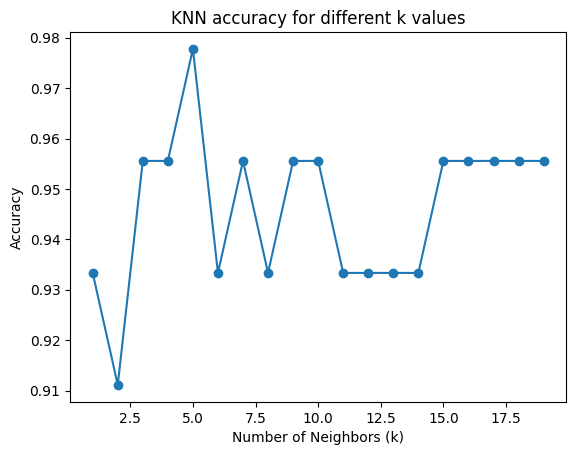

In [8]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris      #loads the Iris dataset from sklearn (already built-in)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  #KNN algorithm from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Load Dataset
iris = load_iris()
X = iris.data      # features (sepal length, sepal width, petal length, petal width)
y = iris.target    # labels (0=setosa, 1=versicolor, 2=virginica)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Initialize KNN (k=5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Step 5: Train the model
knn.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# (Optional) Try different k values
accuracies = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(range(1, 20), accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN accuracy for different k values")
plt.show()
